In [1]:
# import libraries
import ftfy
import nltk
import json
import re
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import numpy as np
import nltk
import seaborn as sb
import warnings

from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.preprocessing import Binarizer


from collections import Counter
from os import listdir, makedirs
from os.path import isfile, join, splitext, split

from nltk.stem import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')


from wordcloud import STOPWORDS, WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.naive_bayes import GaussianNB

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier 
# need to import xboost calssifer

In [2]:
import os
from xlrd import *
import csv 
import sys
import win32com.client as w3c
from tempfile import NamedTemporaryFile

In [3]:
PATH = 'C:/Users/smsoh/Documents/GitHub/CLEF2021/task3/data/Task3a_Batch_1.xlsx'
PASS = 'fake@2021'

In [4]:
xlapp = w3c.Dispatch("Excel.Application")
xlwb = xlapp.Workbooks.Open(PATH, False, True, None, PASS)

In [5]:
#df = pd.read_csv("data/Task3a_Batch_1.xlsx")
f = NamedTemporaryFile(delete=False, suffix='.csv')
f.close()
os.unlink(f.name)

xlCSVWindows = 0x17
xlwb.SaveAs(Filename=f.name, FileFormat=xlCSVWindows)
df = pd.read_csv(f.name)
df

,public_id,text,title,our rating
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",false
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,partially false
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,partially false
3,f14e8eb6,But things took a turn for the worse when riot...,Obama�s Daughters Caught on Camera Burning US ...,false
4,faf024d6,It�s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff�s 78 Visits ...,false
...,...,...,...,...
432,e01f532a,Rosemary Frei and Patrick Corbett A high-prof...,�No one has died from the coronavirus�,false
433,3c791c29,As the coronavirus pandemic continues to devas...,Why Did 21 Million Phone Numbers Disappear fro...,false
434,fe6a9262,Belgium Health Minister Maggie de Block has pu...,Belgium Health Minister puts ban on non-essent...,false
435,97113f55,"Responding To Backlash, Netflix Clarifies Its ...","Responding To Backlash, Netflix Clarifies Its ...",false


In [6]:
bi_class=df.drop([ "title","public_id"], axis = 1)
bi_class.head()

,text,our rating
0,Distracted driving causes more deaths in Canad...,false
1,Missouri politicians have made statements afte...,partially false
2,Home Alone 2: Lost in New York is full of viol...,partially false
3,But things took a turn for the worse when riot...,false
4,It�s no secret that Epstein and Schiff share a...,false


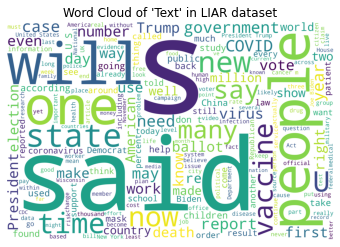

In [7]:
np.random.seed(0) # setting seed to get similar results over multiple experiments.

# word cloud for all the statements in the entire dataset
text = bi_class['text'].values
wordcloud = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Cloud of 'Text' in LIAR dataset")
plt.show()

In [8]:
# creating two dataset consisting of True and Fake statements seperately
np.random.seed(0)
true_statements_dataset = bi_class[bi_class['our rating'].astype(str) == 'true']
fake_statements_dataset = bi_class[bi_class['our rating'].astype(str) == 'false']
partially_false_statements_dataset = bi_class[bi_class['our rating'].astype(str) == 'partially false']

In [9]:
np.random.seed(0)
# contains only TRUE statements
true_statements_dataset.head(5)

,text,our rating
31,It is absolutely right that across this House ...,true
37,Manchin and Capito Introduce Legislation to Im...,true
62,"WASHINGTON, D.C. � Ohio Treasurer Josh Mandel,...",true
73,"BUFFALO, N.Y. WKBW � As people stay home to he...",true
82,SHARE By of the Republican state Rep. Jeff S...,true


In [10]:

# contains only FAKE statements
np.random.seed(0)
fake_statements_dataset.head(5)

,text,our rating
0,Distracted driving causes more deaths in Canad...,false
3,But things took a turn for the worse when riot...,false
4,It�s no secret that Epstein and Schiff share a...,false
6,"November 23, 2019 The U.S. Food and Drug Admi...",false
7,"Trump confirms this was a bombing, not an acci...",false


In [11]:

# contains only FAKE statements
np.random.seed(0)
partially_false_statements_dataset.head(5)

,text,our rating
1,Missouri politicians have made statements afte...,partially false
2,Home Alone 2: Lost in New York is full of viol...,partially false
10,One cannot transfuse democracy at the tip of a...,partially false
13,U.S. Senator Tammy Baldwin Stands Up for Wisco...,partially false
19,WHEELING � At least $53 million a week in ille...,partially false


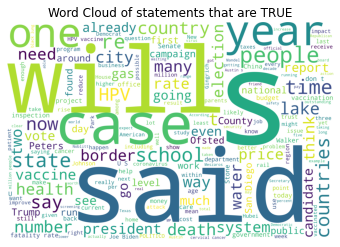

In [17]:
np.random.seed(0)
# creating word cloud for only those statements that are TRUE
text_true = true_statements_dataset['text'].values
wordcloud_true = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_true))
plt.imshow(wordcloud_true)
plt.axis('off')
plt.title("Word Cloud of statements that are TRUE")
plt.show()

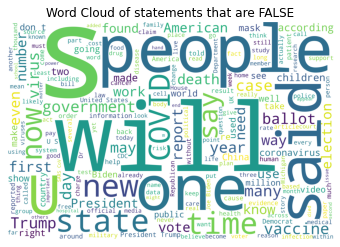

In [13]:

np.random.seed(0)
# creating word cloud for or only those statements that are FAKE
text_false = fake_statements_dataset['text'].values
wordcloud_false = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_false))
plt.imshow(wordcloud_false)
plt.axis('off')
plt.title("Word Cloud of statements that are FALSE")
plt.show()

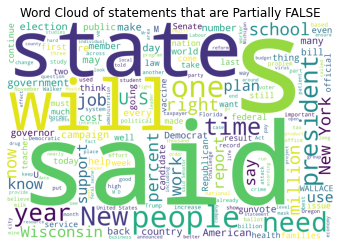

In [14]:

np.random.seed(0)
# creating word cloud for or only those statements that are FAKE
text_partially_false = partially_false_statements_dataset['text'].values
wordcloud_partially_false = WordCloud(width=3000, height=2000, background_color='white',stopwords=STOPWORDS).generate(str(text_partially_false))
plt.imshow(wordcloud_partially_false)
plt.axis('off')
plt.title("Word Cloud of statements that are Partially FALSE")
plt.show()

In [25]:
data = df.drop(["public_id","title"], axis = 1)

In [26]:
data.reset_index(inplace = True)
data.drop(["index"], axis = 1, inplace = True)

In [27]:
data['text'] = data['text'].apply(lambda x: x.lower())

In [28]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

In [29]:
data['text'] = data['text'].apply(punctuation_removal)

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\smsoh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


our rating
false              315
other               21
partially false     80
true                21
Name: text, dtype: int64


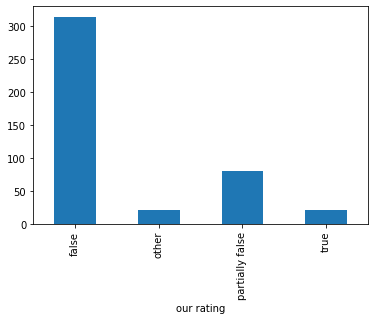

In [31]:
print(data.groupby(['our rating'])['text'].count())
data.groupby(['our rating'])['text'].count().plot(kind='bar')
plt.show()

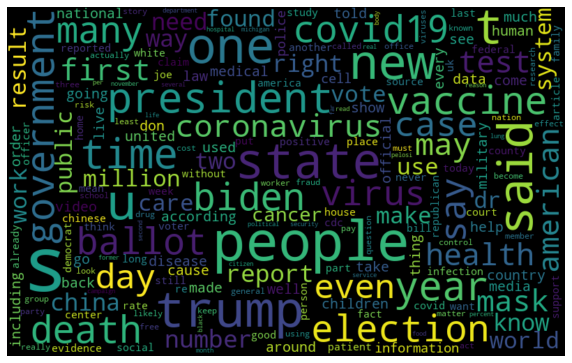

In [32]:
from wordcloud import WordCloud
fake_data = data[data['our rating'] == "false"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

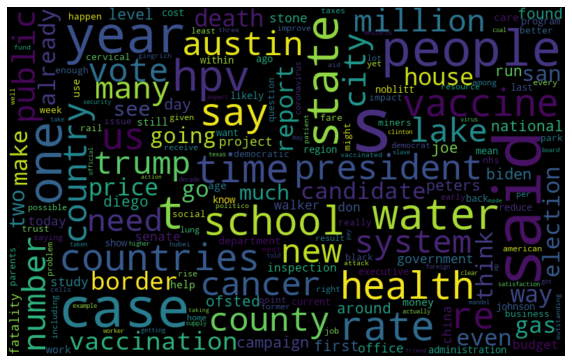

In [33]:
from wordcloud import WordCloud
fake_data = data[data['our rating'] == "true"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [185]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity, title):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.title("Most Use Word of statements that are " + title)    
    plt.show()
    return df_frequency

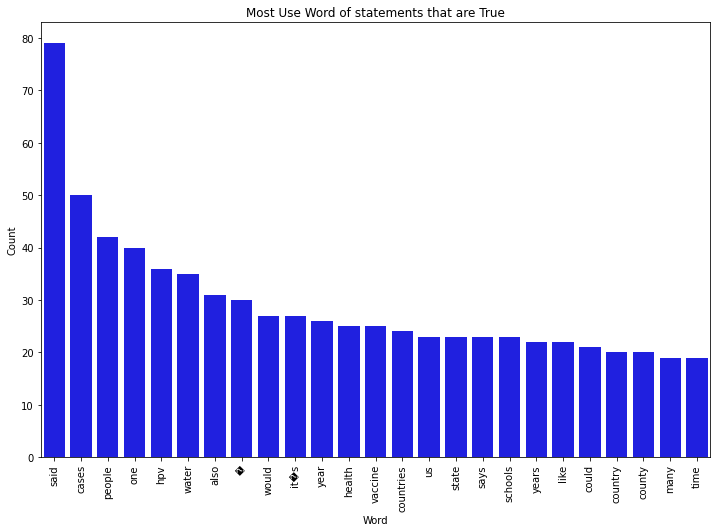

In [193]:
all_true_word = counter(data[data['our rating'] == 'true'], 'text', 25, 'True')

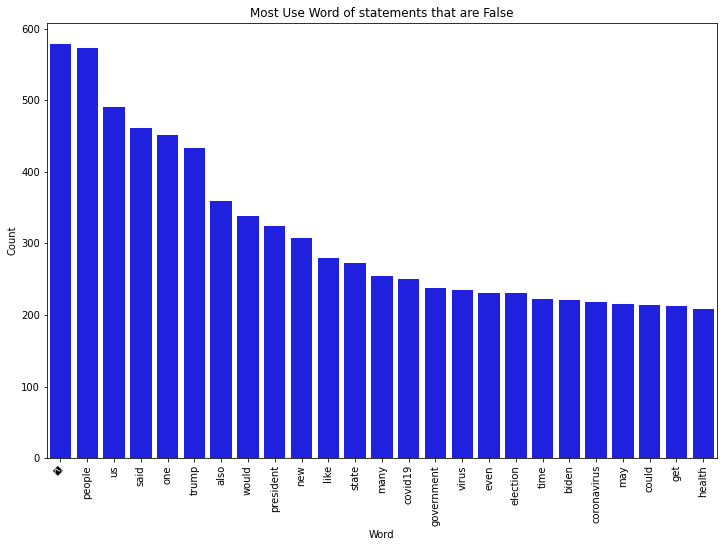

In [194]:
all_false_word = counter(data[data['our rating'] == 'false'], 'text', 25, 'False')

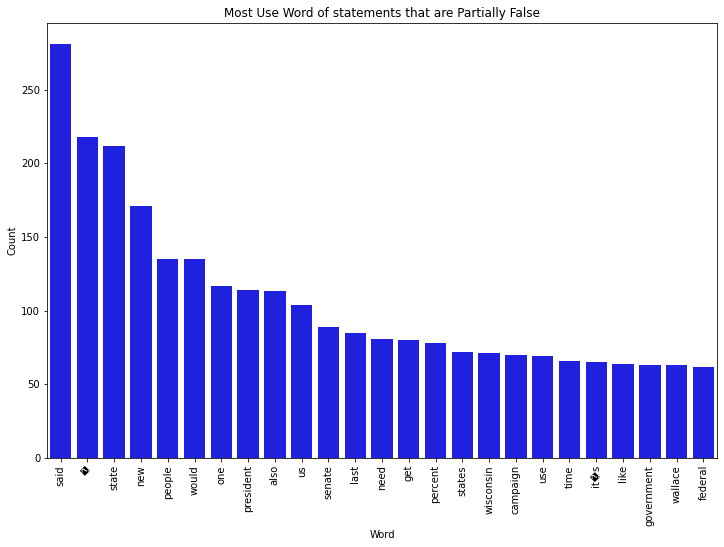

In [195]:
all_partially_false_word = counter(data[data['our rating'] == 'partially false'], 'text', 25, 'Partially False')

In [196]:
def remov_same_word(lists,word):
    for words in lists:
        if words == word:
            return word
    return 'null' 

def check_list(title, ck_list, list1, list2):
    word_list = ck_list.set_index('Word')
    lists = ck_list['Word']

    for word in lists:
        masse_word1 = remov_same_word(list1['Word'],word)
        masse_word2 = remov_same_word(list2['Word'],word)
        if masse_word1 == word:
            word_list.drop( word, inplace = True)
        elif masse_word2 == word:
            word_list.drop( word, inplace = True)
        
    #return word_list.reset_index()
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = word_list.reset_index(), x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.title("Word Only Use in " + title)
    plt.show()


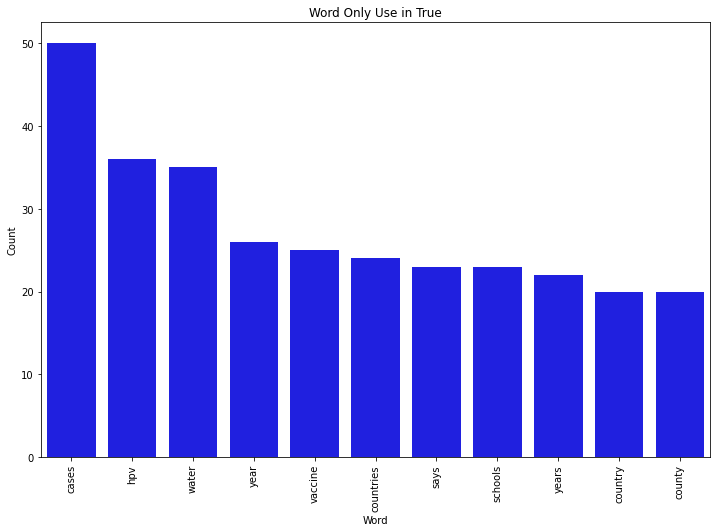

In [197]:
check_list('True', all_true_word, all_false_word, all_partially_false_word)

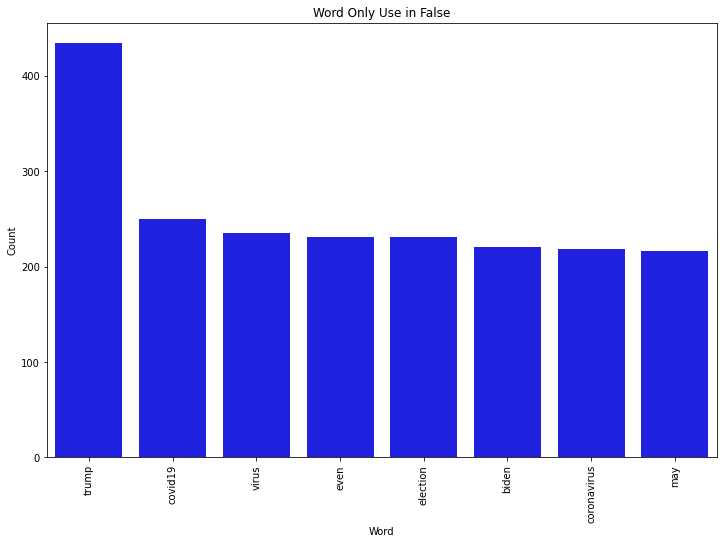

In [198]:
check_list('False', all_false_word, all_true_word, all_partially_false_word)

 TF-IDF

In [38]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [31]:
X_train,X_test,y_train,y_test = train_test_split(data['text'], data['our rating'], test_size=0.2, random_state=42)

##Logistic regression

In [32]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 75.0%


Confusion matrix, without normalization


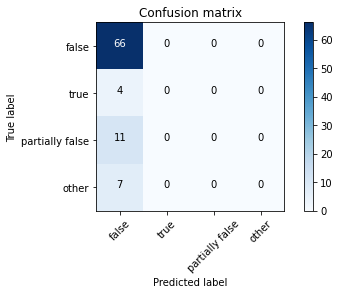

In [34]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['false', 'true','partially false','other'])

##Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier
# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 68.18%


Confusion matrix, without normalization


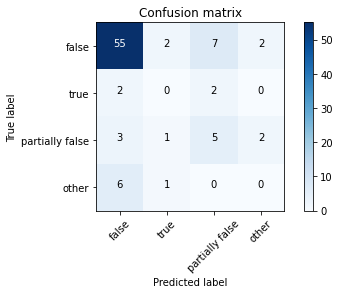

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['false', 'true','partially false','other'])

##Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 76.14%


Confusion matrix, without normalization


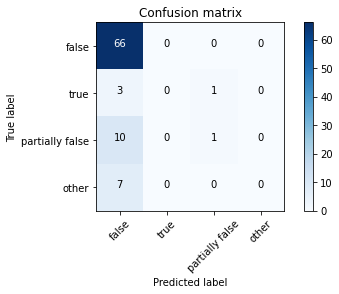

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['false', 'true','partially false','other'])